# HT 7. SVM

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FabianJuarez182/MD-HT7.git)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import SVC
from sklearn.exceptions import FitFailedWarning

## Análisis exploratorio de los datos

In [4]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [6]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

In [7]:
# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['CategoriaPrecio'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


In [8]:
# Crear variables dicotómicas
datos['EsCara'] = (datos['CategoriaPrecio'] == 'Alto').astype(int)
datos['EsMedia'] = (datos['CategoriaPrecio'] == 'Medio').astype(int)
datos['EsEconomica'] = (datos['CategoriaPrecio'] == 'Bajo').astype(int)

# Mostrar las primeras filas para verificar el resultado
print(datos[['CategoriaPrecio', 'EsCara', 'EsMedia', 'EsEconomica']].head())

# Codificación de la variable categórica
le = LabelEncoder()
datos['CategoriaPrecio'] = le.fit_transform(datos['CategoriaPrecio'])

# Escalado de características
scaler = StandardScaler()
X = datos.drop(['SalePrice', 'CategoriaPrecio'], axis=1)  # características
X_scaled = scaler.fit_transform(X)

y = datos['CategoriaPrecio']  # variable objetivo


  CategoriaPrecio  EsCara  EsMedia  EsEconomica
0            Alto       1        0            0
1           Medio       0        1            0
2            Alto       1        0            0
3           Medio       0        1            0
4            Alto       1        0            0


### Inciso 4

Resultados de GridSearchCV:
   param_C param_kernel param_gamma param_degree  mean_test_score
0      0.1       linear         NaN          NaN         1.000000
1        1       linear         NaN          NaN         1.000000
9      0.1         poly         0.1            3         0.989735
13       1         poly         0.1            3         0.989735
4        1          rbf        0.01          NaN         0.989728


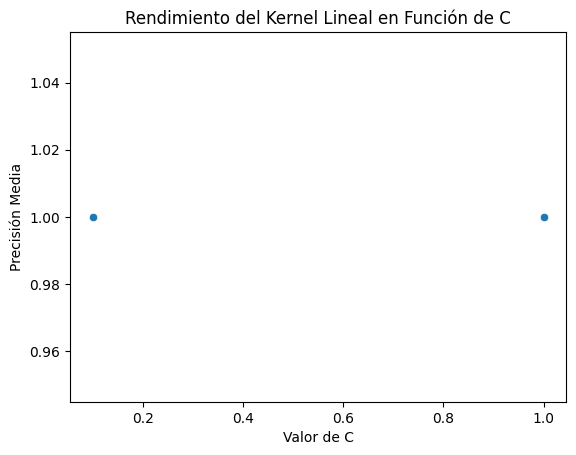

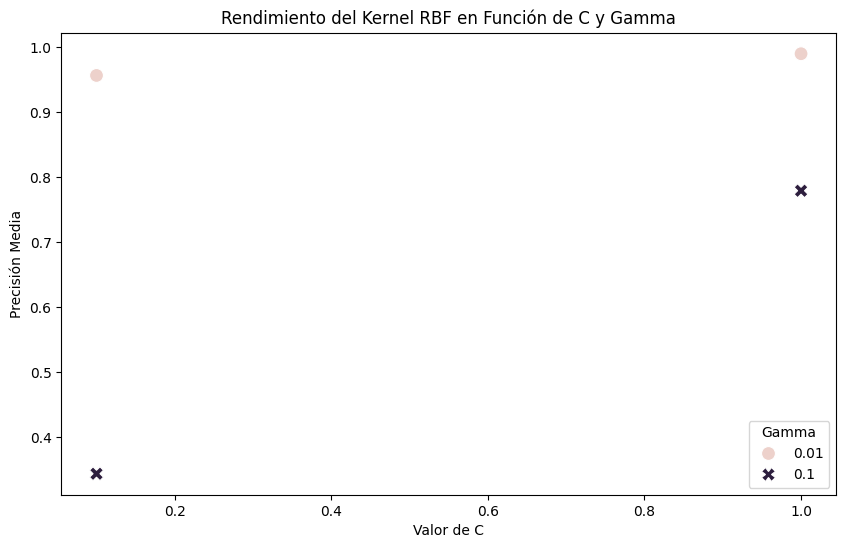

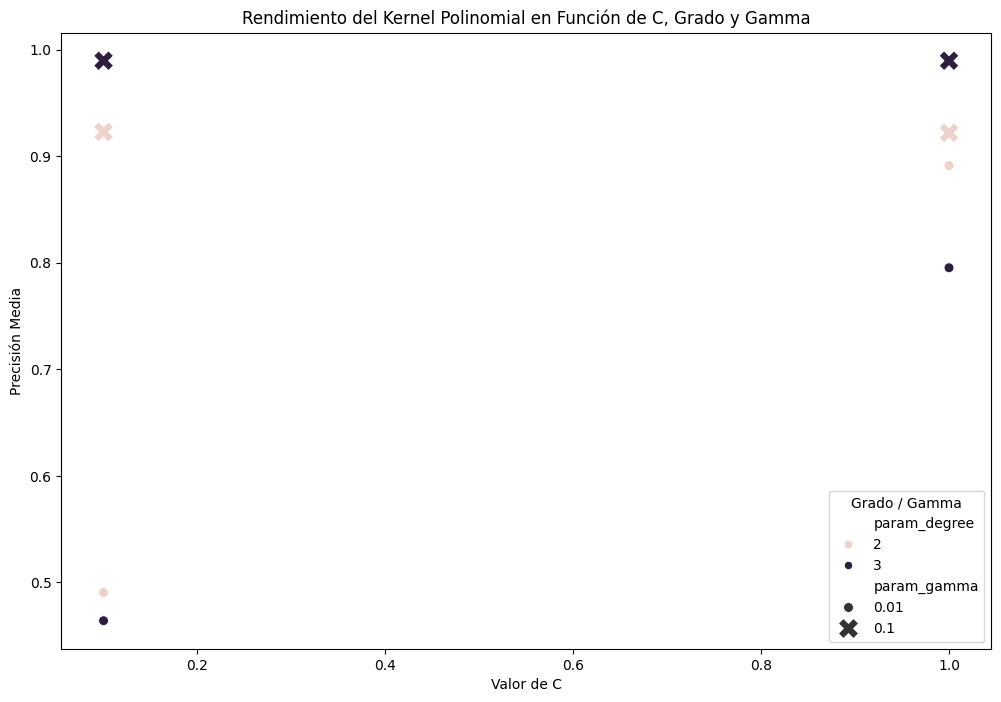

In [16]:

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configuración para GridSearchCV con múltiples kernels y parámetros
param_grid = [
    {'C': [0.1, 1], 'kernel': ['linear']},
    {'C': [0.1, 1], 'gamma': [0.01, 0.1], 'kernel': ['rbf']},
    {'C': [0.1, 1], 'gamma': [0.01, 0.1], 'degree': [2, 3], 'kernel': ['poly']}
]

# Creación del modelo SVM
svc = SVC()

# Aplicación de GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Convertir los resultados de GridSearchCV en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Filtrar las columnas relevantes para visualizar
results = results[['param_C', 'param_kernel', 'param_gamma', 'param_degree', 'mean_test_score']]

# Ordenar los resultados por la puntuación de prueba promedio en orden descendente
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

print("Resultados de GridSearchCV:")
print(results_sorted.head())  # Mostrar las primeras filas para los mejores modelos

# Gráfico para Kernel Lineal
sns.scatterplot(data=results[results['param_kernel']=='linear'], x='param_C', y='mean_test_score')
plt.title('Rendimiento del Kernel Lineal en Función de C')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.show()

# Gráfico para Kernel RBF
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results[results['param_kernel']=='rbf'], x='param_C', y='mean_test_score', hue='param_gamma', style='param_gamma', s=100)
plt.title('Rendimiento del Kernel RBF en Función de C y Gamma')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.legend(title='Gamma')
plt.show()

# Gráfico para Kernel Polinomial
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results[results['param_kernel']=='poly'], x='param_C', y='mean_test_score', hue='param_degree', style='param_gamma', size='param_gamma', sizes=(50, 200))
plt.title('Rendimiento del Kernel Polinomial en Función de C, Grado y Gamma')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.legend(title='Grado / Gamma')
plt.show()

### Inciso 5 y 6

  param_C param_kernel param_gamma param_degree  mean_test_score
0     0.1       linear         NaN          NaN         1.000000
9     0.1         poly         0.1            3         0.989735
4       1          rbf        0.01          NaN         0.989728


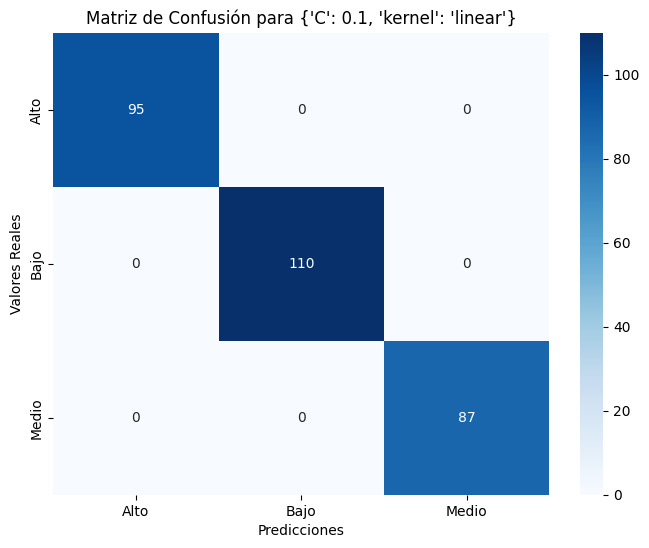

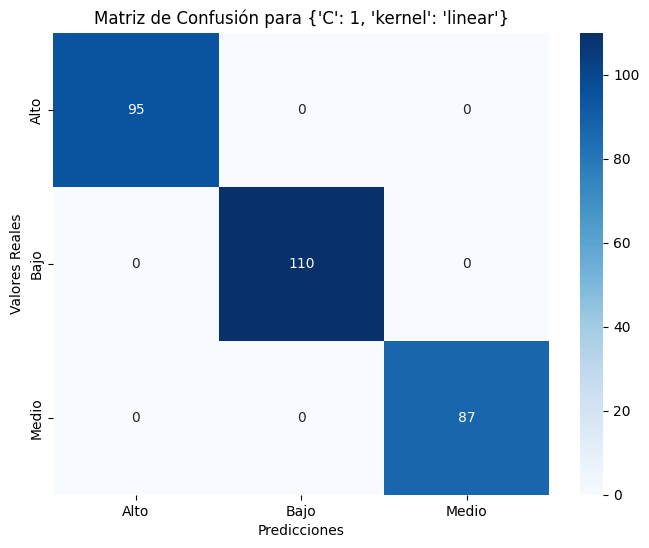

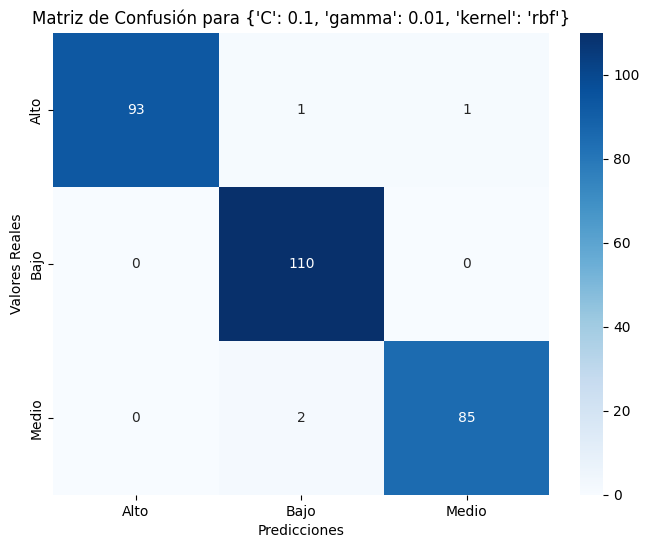

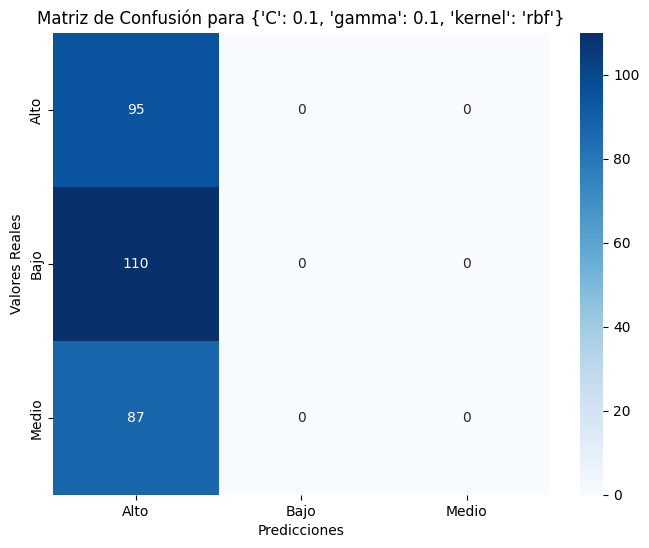

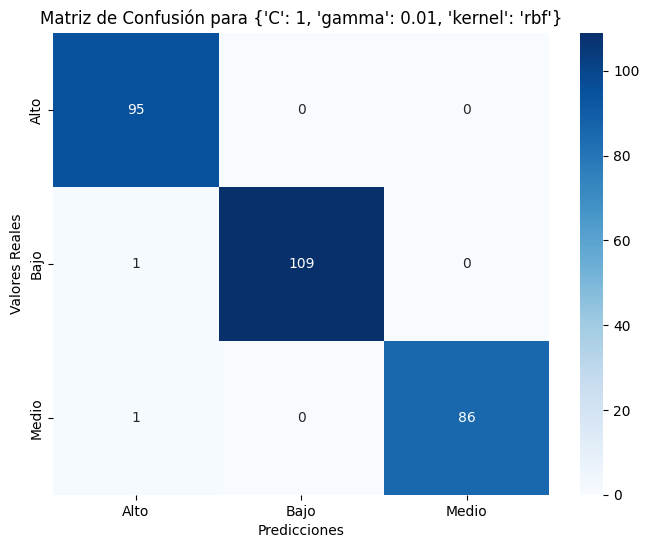

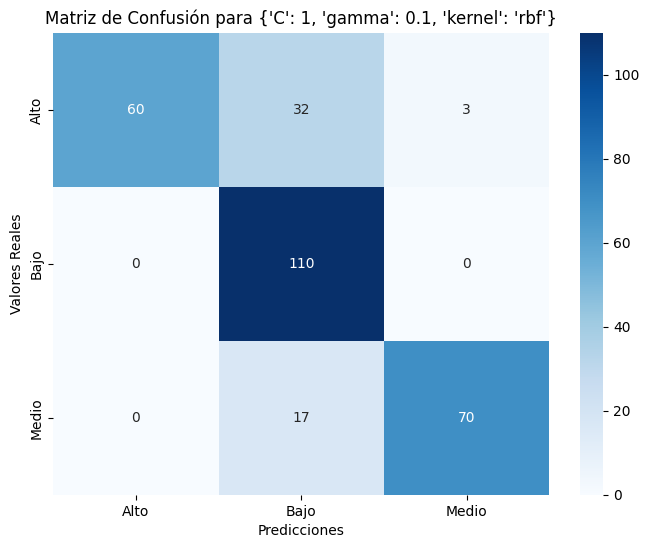

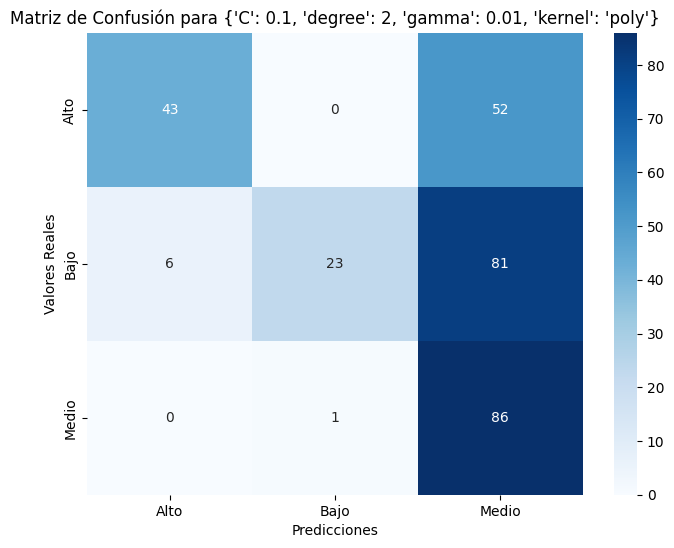

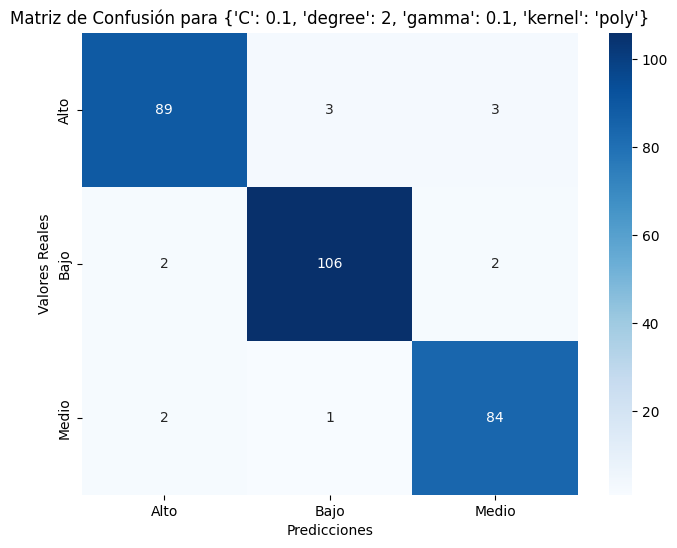

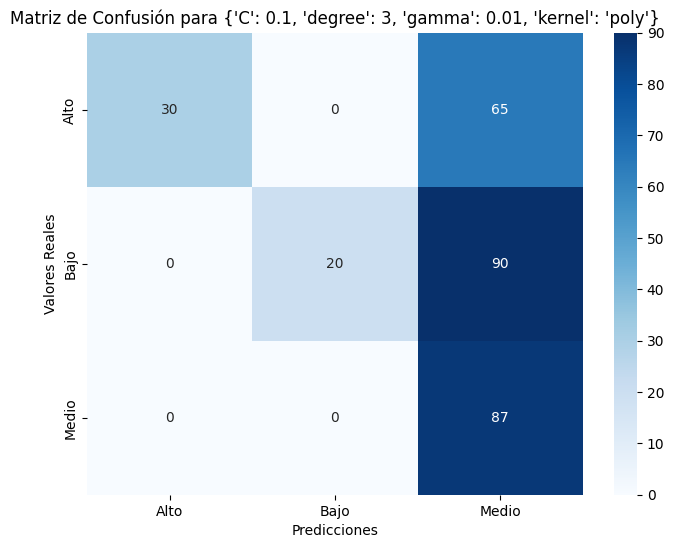

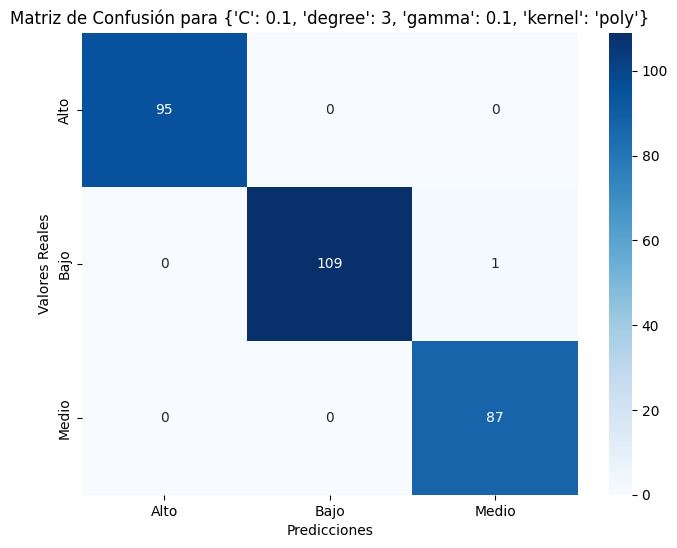

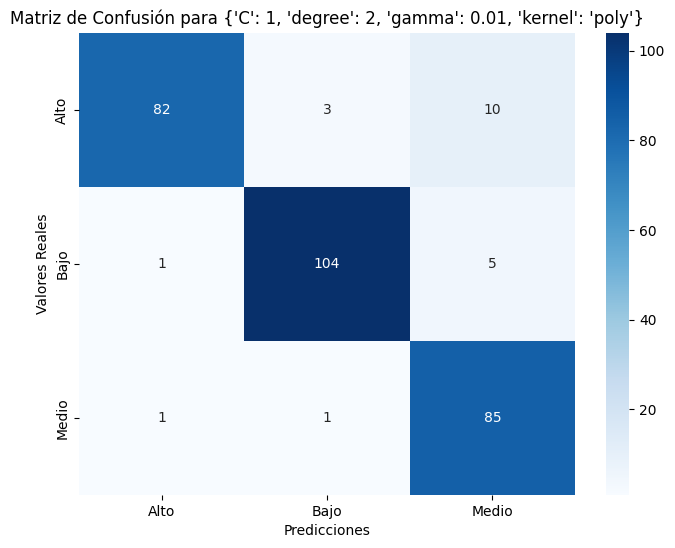

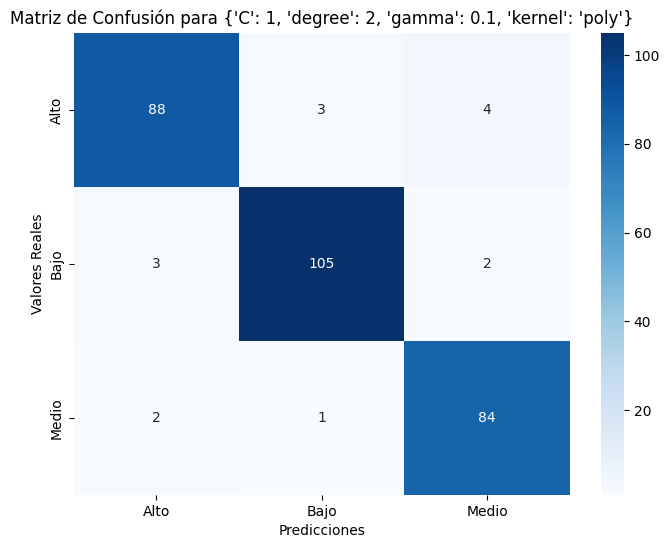

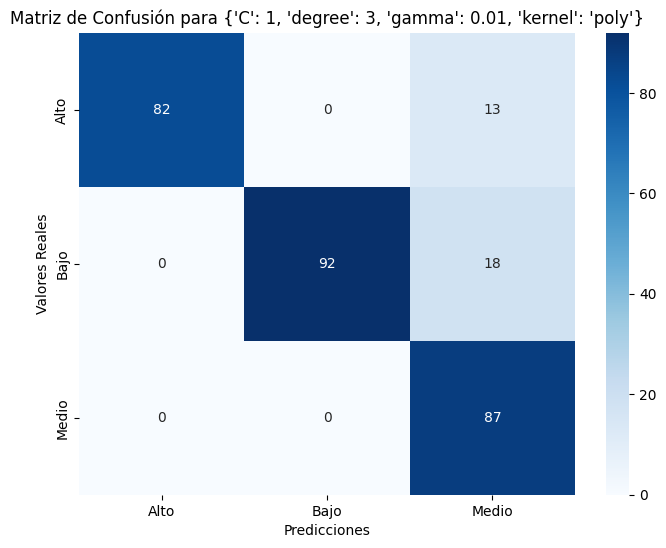

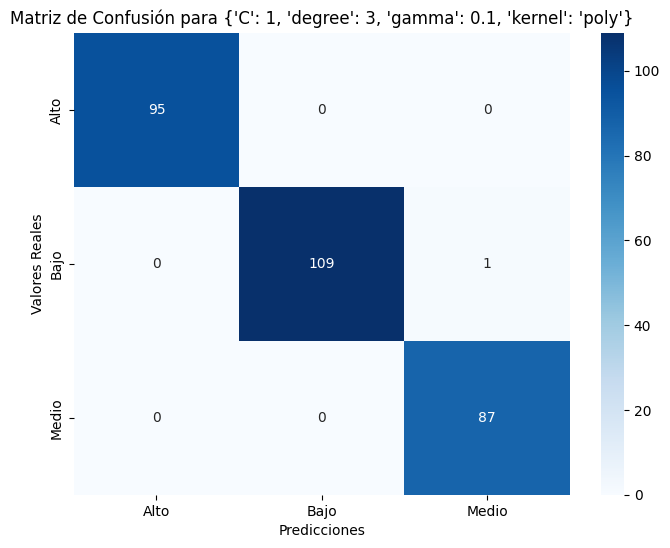

In [30]:

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los mejores modelos nuevamente después de la nueva búsqueda
results = pd.DataFrame(grid_search.cv_results_)
best_models = results.loc[results.groupby('param_kernel')['rank_test_score'].idxmin()]
print(best_models[['param_C', 'param_kernel', 'param_gamma', 'param_degree', 'mean_test_score']])
# Uso del mejor modelo para predecir
y_pred = best_estimator.predict(X_test)


# Generación de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Iterar sobre todos los parámetros probados en el grid search
for params in grid_search.cv_results_['params']:
    # Crear un nuevo modelo SVC con los parámetros específicos
    model = SVC(**params)
    model.fit(X_train, y_train)  # Ajustar el modelo al conjunto de entrenamiento
    
    # Predecir las etiquetas del conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Visualizar la matriz de confusión como un mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusión para {params}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()


### Inciso 7

In [32]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Asumiendo que la configuración del SVC y GridSearchCV ya se ha completado correctamente

# Ejecutar GridSearchCV (asegúrate de que esta línea se ejecuta sin errores antes de continuar)
grid_search.fit(X_train, y_train)

# Extraer los resultados en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Identificar el mejor modelo para cada tipo de kernel
best_models = results.loc[results.groupby('param_kernel')['rank_test_score'].idxmin()]

# Iterar sobre los mejores modelos para cada kernel
for index, row in best_models.iterrows():
    kernel = row['param_kernel']
    C = row['param_C']
    model_params = {'C': C, 'kernel': kernel}

    # Agregar 'gamma' si es aplicable y no es NaN
    if 'gamma' in row.index and pd.notna(row['param_gamma']):
        model_params['gamma'] = row['param_gamma']

    # Agregar 'degree' si el kernel es 'poly' y 'degree' no es NaN
    if kernel == 'poly' and 'degree' in row.index and pd.notna(row['param_degree']):
        model_params['degree'] = int(row['param_degree'])  # Convertir a entero

    # Crear y ajustar el modelo con los parámetros aplicables
    model = SVC(**model_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Imprimir el informe de clasificación
    print(f"Reporte de clasificación para el kernel {kernel} con parámetros {model_params}:")
    print(classification_report(y_test, y_pred))
    print()  # Espacio entre informes


Reporte de clasificación para el kernel linear con parámetros {'C': 0.1, 'kernel': 'linear'}:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00        87

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292


Reporte de clasificación para el kernel poly con parámetros {'C': 0.1, 'kernel': 'poly'}:
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        95
           1       1.00      0.25      0.39       110
           2       0.38      1.00      0.56        87

    accuracy                           0.52       292
   macro avg       0.79      0.55      0.51       292
weighted avg       0.82      0.52      0.50       292


Reporte de clasificación para el kernel rbf con pará

Kernel Linear (C=0.1, 'linear'):
La precisión, el recall y el f1-score son perfectos (1.00) para todas las clases. Estos resultados sugieren un posible sobreajuste, especialmente porque es raro obtener un rendimiento perfecto en datos reales.
Para abordar el sobreajuste, se puede aumentar el valor de C para permitir un margen de error más amplio, introducir técnicas de regularización y validación cruzada.

Kernel Polinomial (C=0.1, 'poly'):
Baja precisión global (0.52 de precisión) y bajo f1-score para las clases 0 y 1. Esto indica un desajuste significativo, ya que el modelo no logra generalizar bien las predicciones para las diferentes clases.
Para manejar el desajuste, se puede ajustar los parámetros del kernel y aumentar la complejidad del modelo, agregando más características o usar un modelo más complejo.

Kernel RBF (C=1, 'rbf'):
Altos valores en precisión, recall y f1-score (alrededor de 0.99). Aunque los resultados son muy buenos, hay que estar atentos al posible sobreajuste debido a la alta precisión.
Para manejarlo se puede considerar ajustar el valor de C, utilizar validación cruzada para confirmar estos resultados y revisar la necesidad de regularización.

### Inciso 8